# Optimization of ML Regression Models
In this project, we will compare the performance of different machine learning regression models on the Auto-MPG data set. In addition, we will look into how to optimize each model for best performance. 

The `PipeLine` and `GridSearch` tools from the Scikit-Learn library will be utilized. 

The following regression models will be studied:
* Linear Models: `LinearRegression`, `Ridge`, `Lasso` and `ElasticNet`
* K-nearest Neighbor Regression: `KNeighborsRegressor`
* Support Vector Regression: `SVR` with `linear`, `poly`, `sigmoid` and `rbf` kernels
* Decision Tree Regression: `DecisionTreeRegressor` and `ExtraTreeRegressor`
* Bagging Algorithms: `BaggingRegressor`, `RandomForestRegressor` and `ExtraTreesRegressor`
* Boosting Algorithms: `AdaBoostRegressor` and `GradientBoostingRegressor`

For this project we will use the [`Auto MPG`](https://archive.ics.uci.edu/ml/datasets/Auto+MPG) data set. Please follow the instructions in the post [`Working with the Auto MPG Data Set`](./autompg-data.html) to get yourself familiar with the dataset, prepare the data for analysis and generate the `auto-mpg.csv` that will be used in this project.

***
## 1. Loading and Preparing the Data

Sections 1 in the previous post titled [`Impact of Scaling on Machine Learning Algorithms`](./scaling-ML) go over the scaling differences in the data in detail.

Below, the code that separates the data into inputs, `X` and output, `y` is provided.

In [3]:
import pandas as pd
import numpy as np

filename = "auto-mpg.csv"
df = pd.read_csv(filename)
output = df.iloc[:,0]
features = df.iloc[:, 1:8]
X = features.values
y = output.values
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


The y variable holds the mpg column data and the X variable holds the data in the cylinders, displacement, horsepower, weight, acceleration, year and origin columns (the name column is not used in this project).

***
## 2. Test and Display Functions

The following funtions will be used in the remaining parts of this post.

In [4]:
def get_modelname(model):
    name = str(model).partition('(')[0]
    if name=='SVR':
        name = model.get_params()['kernel'] + name
    return(name)

`get_modelname` extracts the name of the model from the model function call. For support vector regression, the kernel name is also prepended to the model name. 

In [5]:
def evalModels(models, Xw, y, boxPlotOn=True):
    from sklearn.preprocessing import StandardScaler # Standardize data (0 mean, 1 stdev)
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    from sklearn.pipeline import Pipeline, make_pipeline

    scoring = 'r2'  #'neg_mean_squared_error'
    modelnames = []
    results = []
    for model in models:
        pipe = make_pipeline( StandardScaler(), model )
        kfold = KFold(n_splits=8, random_state=6, shuffle=True)
        cv_results = cross_val_score(pipe, Xw, y, cv=kfold, scoring=scoring)
        modelname = get_modelname(model)
        print "%s: %.3f %.3f" %(modelname, cv_results.mean(), cv_results.std())
        modelnames.append(modelname)
        results.append(cv_results)
    
    if boxPlotOn:
        import matplotlib.pyplot as plt
        # boxplot algorithm comparison
        fig = plt.figure()
        fig.suptitle('Algorithm Comparison')
        ax = fig.add_subplot(111)
        plt.boxplot(results, showmeans=True)
        ax.set_xticklabels(modelnames, fontsize=9)
        plt.ylim(0.7, 0.95)
        plt.show()
    
    return(results)

The `evalModels` function includes the following:
* A `pipeline` that includes standardization of the input vectors (so that variance is 1 and mean is zero) and application of the ML model. 
* 8-split, shuffled cross-validation
* Box plotting all the performance results

***
## 3. Pipelining transformers and predictors

It is important to extract tranformation parameters (such as scaling) from only the training data and keep the testing data untouched in this regard. The most convenient way to accomplish this by using the pipelining feature in scikit-learn. 

The following example from the scikit-learn website shows how to achieve this without pipelining:

In [ ]:
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.4, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(C=1).fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
clf.score(X_test_transformed, y_test)  

The following sample code using a pipeline, however, is much simpler, allows treating the pipeline as a model so that multi-split cross validation can be applied easily:

In [ ]:
from sklearn.pipeline import make_pipeline
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
cross_val_score(clf, iris.data, iris.target, cv=cv)               

In this project, all performance simulations are run using a pipeline formed by calling the function `evalModels` above.

***
## 4. Comparison of ML regression models

In this section we run all regression models using 8-split cross-validation and compare the R² results.

All regressors have been manually optimized. In other words, a manual search has been conducted in the parameter space of each regressor for the best performing parameter set which was then used to call each model. The default setting is kept for those parameters that did not make any noticeable difference. 

All input data has been standardized on the training data set.

### 4.1 Linear Regression

LinearRegression: 0.809 0.036
Ridge: 0.809 0.037
Lasso: 0.804 0.042
ElasticNet: 0.805 0.038


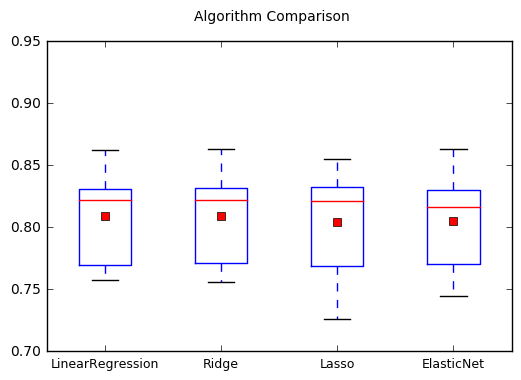

In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# create and evaluate pipeline
models = []
models.append( LinearRegression() )
models.append( Ridge(alpha=1.0) )
models.append( Lasso(alpha=0.5) )
models.append( ElasticNet(alpha=0.1, l1_ratio=0.5) )

Xw = X
results = evalModels(models, Xw, y, boxPlotOn=True)

All linear regression models perform similarly. The linear models with regularization most likely act like a standard linear regressor since the data is standardized. Top performing score is `R²=0.81` with std `0.36` achieved by standard linear regression.

### 4.2 K-Neigbors  and Support Vector Regression

linearSVR: 0.802 0.044
polySVR: 0.798 0.044
sigmoidSVR: 0.768 0.052
rbfSVR: 0.882 0.034
KNeighborsRegressor: 0.856 0.037


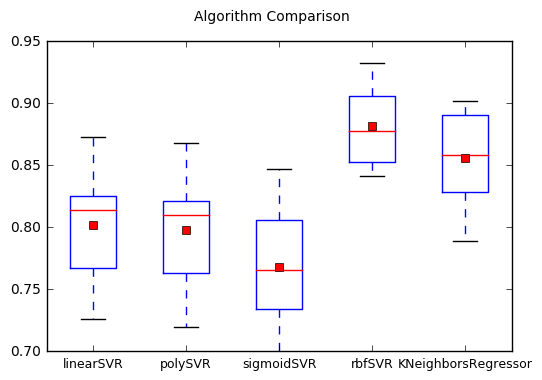

In [52]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# create and evaluate pipeline
models = []
models.append( SVR(kernel='linear', C=10, epsilon=0.3, shrinking=False) )
models.append( SVR(kernel='poly', C=4, epsilon=0.1, degree=1) )
models.append( SVR(kernel='sigmoid', C=0.2) )
models.append( SVR(kernel='rbf', C=20, epsilon=1.5) )
models.append( KNeighborsRegressor(weights='distance', p=2) )

Xw = X
results = evalModels(models, Xw, y, boxPlotOn=True)

Both K-nearest neighbor and support vector machine regressors are distance-based predictors. 

The support vector regressor with a linear kernel, `linearSVR`, somewhat mimics the linear regression results above. `SVR` with a polynomial kernel, `polySVR`, converges to `linearSVR` in performance as degree of the polynomial kernel is reduced to 1. The `sigmoidSVR` using a sigmoid kernel is the most inferior of the `SVR` models. 

The `SVR` model with a radial-basis-function, `rbfSVR`, produces the best performance with `R²=0.88` and std `0.34`. This is the best result achieved in this study.

The K-neighbors regressor performance is also very strong. 

### 4.3 Decision Tree and Bagging regression algorithms

DecisionTreeRegressor: 0.816 0.052
ExtraTreeRegressor: 0.803 0.051
BaggingRegressor: 0.867 0.035
RandomForestRegressor: 0.867 0.030
ExtraTreesRegressor: 0.878 0.033


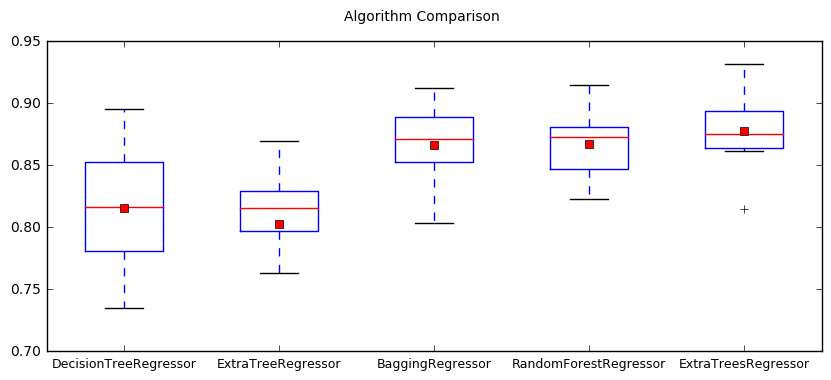

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

# create and evaluate pipeline
models = []
models.append( DecisionTreeRegressor(max_leaf_nodes=9, min_samples_leaf=18) )
models.append( ExtraTreeRegressor(criterion='mae', max_leaf_nodes=50, min_samples_leaf=4, min_samples_split=6) )
cart = DecisionTreeRegressor()
models.append( BaggingRegressor(base_estimator=cart, random_state=7, n_estimators=300, max_features=6) )
models.append( RandomForestRegressor(n_estimators=100, max_features=4, criterion='mae', max_leaf_nodes=50, min_samples_split=4) )
models.append( ExtraTreesRegressor(n_estimators=100, max_features=4, max_depth=1000, min_samples_split=6) )

Xw = X
plt.rcParams["figure.figsize"] = [10, 4]
results = evalModels(models, Xw, y, boxPlotOn=True)
plt.rcParams["figure.figsize"] = [6, 4]

In this plot we are looking at the perfomance of decision tree variants of regression models. Albeit with a higher std, the basic decision tree regressor, `DecisionTreeRegressor`, performs on average slightly better than linear regression models and its sibling, the `ExtraTreeRegressor`. 

The three bagging algorithms on the right employ 100-300 trees and show a strong performance with the `ExtraTrees` bagging algorithm almost matching the top performance of `rbfSVR` arriving at `R²=0.88` and std `0.33`. 

### 4.4 Boosting methods

AdaBoostRegressor: 0.820 0.026
GradientBoostingRegressor: 0.851 0.027


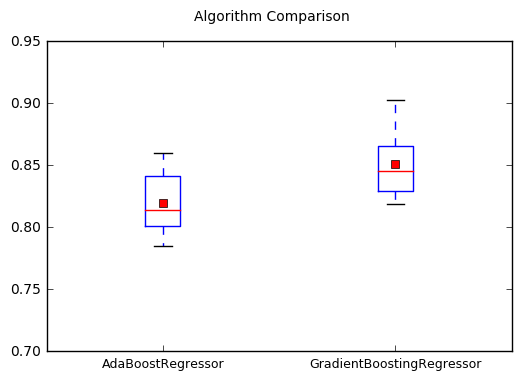

In [54]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# create and evaluate pipeline
models = []
models.append( AdaBoostRegressor(n_estimators=10, random_state=7) )
models.append( GradientBoostingRegressor(n_estimators=80, criterion='mae', max_features=5, min_samples_split=15, random_state=7) )

Xw = X
results = evalModels(models, Xw, y, boxPlotOn=True)

The boosting methods are also decision-tree based as the models covered in the previous section although the optimum number of trees were found to be much lower than that of the bagging methods: `10` for `AdaBoost` and `80` for `GradientBoosting`. Although their average peformance is somewhat lower than the bagging methods, the boosting methods has the lowest std in performance so far: `0.26` for `AdaBoost`.

### 4.5 Comparison Summary

Below is the list of ML methods producing an average R² value larger than 0.85 starting with the highest score:
* `SVR` with `rbf` kernel    : 0.882 with std of 0.034
* `ExtraTreesRegressor`      : 0.878 with std of 0.033
* `RandomForestRegressor`    : 0.867 with std of 0.030
* `BaggingRegressor`         : 0.867 with std of 0.035
* `KNeighborsRegressor`      : 0.856 with std of 0.037
* `GradientBoostingRegressor`: 0.851 with std of 0.027

***
## 5. Algorithm Tuning

### 5.1 Grid Search Parameter Tuning

In [8]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
standardizedX = scaler.transform(X)
Xw = standardizedX
from sklearn.model_selection import KFold

# Grid Search for Algorithm Tuning
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alphas = np.array([1,0.5,0.2,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Ridge()
kfold = KFold(n_splits=8, random_state=6, shuffle=True)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold)
grid.fit(Xw, y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
#print grid.cv_results_

0.809570605568
1.0


### 5.2 Random Search Parameter Tuning

In [9]:
Xw = standardizedX

# Randomized for Algorithm Tuning
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'alpha': uniform()}
seed=6
model = Ridge()
kfold = KFold(n_splits=8, random_state=seed, shuffle=True)

rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=kfold, random_state=seed)
rsearch.fit(Xw, y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

0.809570412842
0.994207438422
